### Problem Statement:
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g.,
https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
3. Create a box plot for each feature in the dataset.
4. Compare distributions and identify outliers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
iris = pd.read_csv('iris.data')
iris_copy = iris.copy()
iris_copy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Feature Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      * Iris Setosa
      * Iris Versicolour
      * Iris Virginica

In [7]:
iris_copy.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:title={'center':'Distribution of petal width'}, xlabel='petal width (cm)', ylabel='Count'>

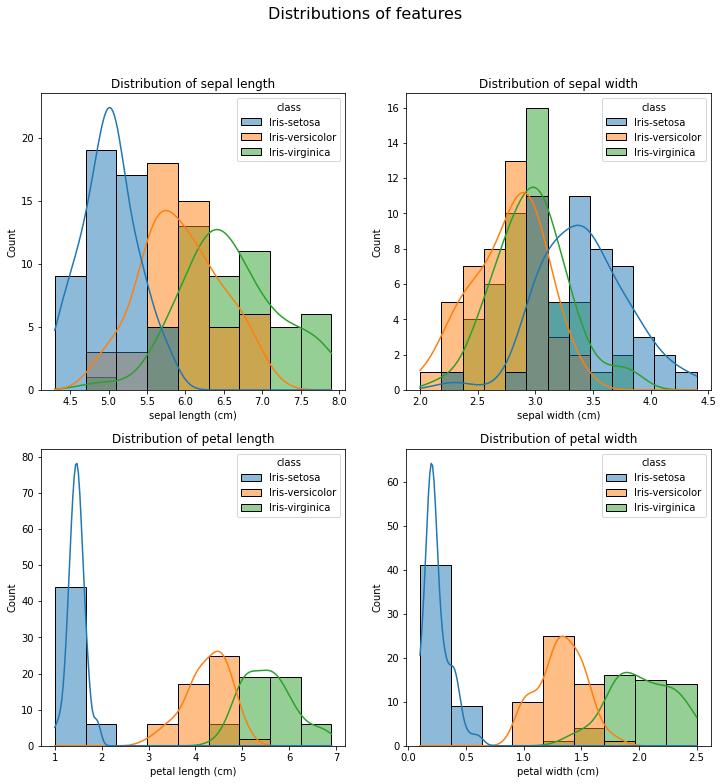

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Distributions of features', fontsize=16)
axs[0][0].set_title('Distribution of sepal length')
sns.histplot(x='sepal length (cm)', data=iris_copy, ax=axs[0][0], kde = True, hue='class')
axs[0][1].set_title('Distribution of sepal width')
sns.histplot(x='sepal width (cm)', data=iris_copy, ax=axs[0][1], kde = True, hue='class')
axs[1][0].set_title('Distribution of petal length')
sns.histplot(x='petal length (cm)', data=iris_copy, ax=axs[1][0], kde = True, hue='class')
axs[1][1].set_title('Distribution of petal width')
sns.histplot(x='petal width (cm)', data=iris_copy, ax=axs[1][1], kde = True, hue='class')

1. Subplot 1 shows that there is a significant amount of overlap between the species on sepal length, so it is not an effective classification feature.
2. Subplot 2 shows that there is even higher overlap between the species on sepal width, so it is not an effective classification feature.
3. Subplot 3 shows that petal length is a good classification feature as it clearly separates the species . The overlap is extremely less (between Versicolor and Virginica) , Setosa is well separated from the rest two.
4. Subplot 4 also shows that petal width is a good Classification feature . The overlap is significantly less (between Versicolor and Virginica) , Setosa is again well separated from the rest two.

<AxesSubplot:title={'center':'Box plots of all features in the dataset.'}>

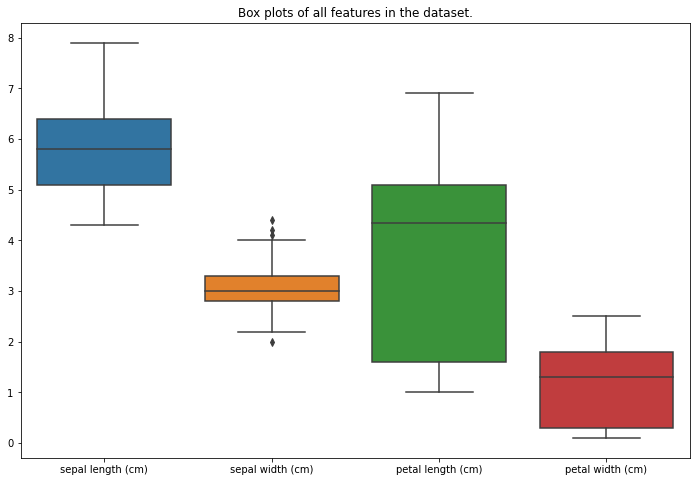

In [29]:
plt.figure(figsize=(12,8))
plt.title('Box plots of all features in the dataset.')
sns.boxplot(data=iris_copy)

As we can see from the above boxplots of each feature in the dataset, there are no outliers in the dataset except for the one feature which is `sepal width (cm)`. Boxplot uses IQR i.e. Inter Quartile Range to indetify outliers in the features. 

In [44]:
iris_copy.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
q1 = iris_copy['sepal width (cm)'].quantile(0.25)
q3 = iris_copy['sepal width (cm)'].quantile(0.75)
IQR = q3-q1
print('Inter Quartile Range (IQR) for feature sepal width:', IQR)
LB = q1-1.5*IQR
print('Lower bound =', LB)
UB = q3+1.5*IQR
print('Upper bound =', UB)
print('These are the outliers:')
print(list(iris_copy[(iris_copy['sepal width (cm)'] < 2.05) | 
                                                  (iris_copy['sepal width (cm)'] > 4.05)]['sepal width (cm)']))

Inter Quartile Range (IQR) for feature sepal width: 0.5
Lower bound = 2.05
Upper bound = 4.05
These are the outliers:
[4.4, 4.1, 4.2, 2.0]


Thus the four outliers are detected from the feature `sepal width (cm)`.